## Collecting Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
df = yf.download('AAPL', start='2012-01-01', end='2019-12-31')
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.333215,12.371304,12.266335,12.278332,302220800
2012-01-04,12.399497,12.436687,12.274735,12.296328,260022000
2012-01-05,12.537154,12.552749,12.376402,12.444782,271269600
2012-01-06,12.668215,12.678712,12.572844,12.589339,318292800
2012-01-09,12.648124,12.828670,12.636727,12.761191,394024400


## Exploration Data Analysis(EDA):

In [4]:
df = df.reset_index()
df.columns = df.columns.map(lambda x: x[0] if isinstance(x, tuple) else x)
df.columns = df.columns.str.lower()

In [5]:
df.tail()

,date,close,high,low,open,volume
2006,2019-12-23,68.523346,68.583666,67.647501,67.686106,98572000
2007,2019-12-24,68.588493,68.738093,68.262772,68.689834,48478800
2008,2019-12-26,69.949318,69.966209,68.692254,68.721207,93121200
2009,2019-12-27,69.922760,70.928898,69.517412,70.241251,146266000
2010,2019-12-30,70.337761,70.620061,68.817704,69.840726,144114400


In [6]:

df.describe()

,date,close,high,low,open,volume
count,2011,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,2016-01-01 03:10:28.344107520,29.033147,29.281236,28.767409,29.024586,2.379867e+08
min,2012-01-03 00:00:00,11.885281,12.161315,11.720025,11.807370,4.544800e+07
25%,2014-01-02 12:00:00,18.234553,18.426197,18.080400,18.276986,1.103426e+08
50%,2015-12-31 00:00:00,25.563263,25.762766,25.261639,25.533173,1.738760e+08
75%,2017-12-28 12:00:00,38.882473,39.325309,38.358313,38.840819,2.988412e+08
max,2019-12-30 00:00:00,70.337761,70.928898,69.517412,70.241251,1.506120e+09
std,NaN,12.739604,12.829207,12.624593,12.716776,1.873543e+08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2011 non-null   datetime64[ns]
 1   close   2011 non-null   float64       
 2   high    2011 non-null   float64       
 3   low     2011 non-null   float64       
 4   open    2011 non-null   float64       
 5   volume  2011 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 94.4 KB


In [8]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

In [9]:
df.head(5)

,date,close,high,low,open,volume
0,2012-01-03,12.333215,12.371304,12.266335,12.278332,302220800
1,2012-01-04,12.399497,12.436687,12.274735,12.296328,260022000
2,2012-01-05,12.537154,12.552749,12.376402,12.444782,271269600
3,2012-01-06,12.668215,12.678712,12.572844,12.589339,318292800
4,2012-01-09,12.648124,12.828670,12.636727,12.761191,394024400


In [10]:
df.isnull().sum()

,0
date,0
close,0
high,0
low,0
open,0
volume,0


In [11]:
df.dtypes

,0
date,datetime64[ns]
close,float64
high,float64
low,float64
open,float64
volume,int64


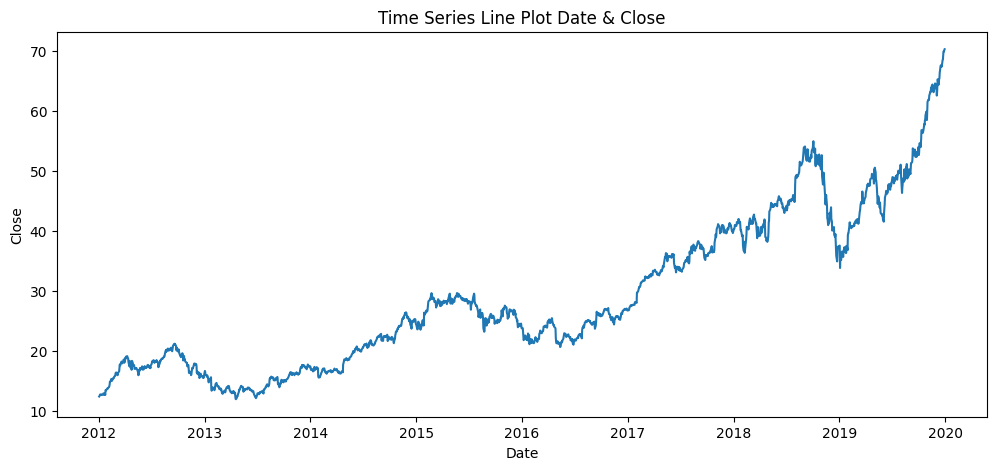

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['date'], df['close'])
plt.title("Time Series Line Plot Date & Close")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()



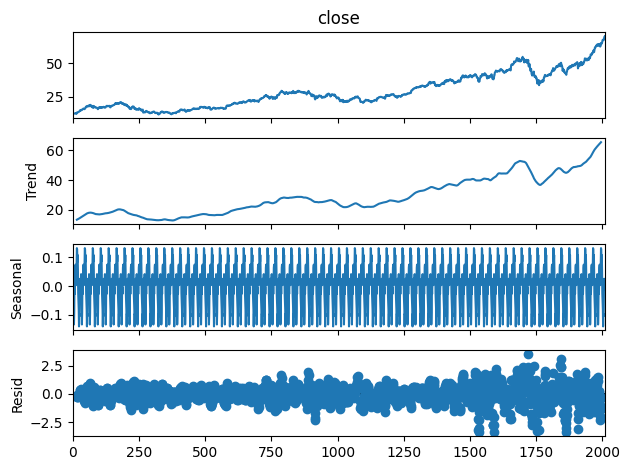

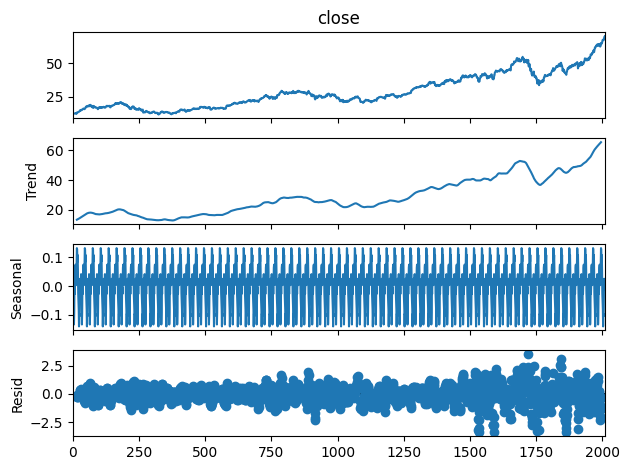

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['close'],model='additive',period=30)
decomposition.plot()

In [14]:
df.shape

(2011, 6)

In [15]:
import warnings
warnings.filterwarnings('ignore')
df['close_diff']=df['close'].diff()
df['close_diff'].replace([np.inf,-np.inf],np.nan,inplace=True)
diff_series=df['close_diff'].dropna()


In [16]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(diff_series)
print(result)

(np.float64(-13.472638739645134), np.float64(3.359070368653125e-25), 8, 2001, {'1%': np.float64(-3.433622218212895), '5%': np.float64(-2.8629854902259004), '10%': np.float64(-2.5675395171404802)}, np.float64(2829.6798637893717))


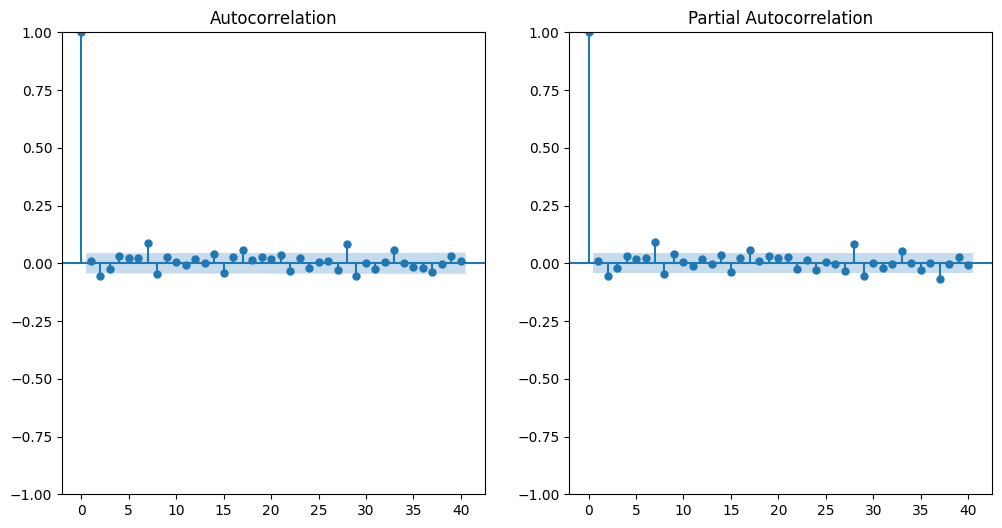

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(121)
plot_acf(df['close_diff'].dropna(),lags=40,ax=plt.gca())

plt.subplot(122)
plot_pacf(df['close_diff'].dropna(),lags=40,ax=plt.gca())

plt.show()

In [18]:
df['close']=pd.to_numeric(df['close'],errors='coerce')
df['close'].fillna(method='ffill',inplace=True)
df['close'].dropna(inplace=True)
df['close'].dtype

dtype('float64')

In [19]:
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df.loc[
    (df['close'] < (Q1 - 1.5 * IQR)) |
    (df['close'] > (Q3 + 1.5 * IQR))
]

print("Number of IQR outliers:", len(outliers_iqr))
print(outliers_iqr[['close']])


Number of IQR outliers: 3
          close
2008  69.949318
2009  69.922760
2010  70.337761


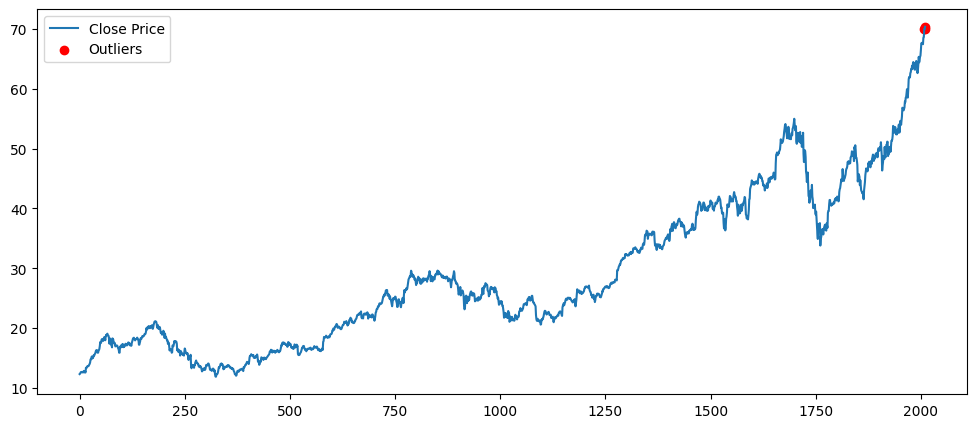

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['close'], label='Close Price')
plt.scatter(outliers_iqr.index, outliers_iqr['close'], color='red', label='Outliers')
plt.legend()
plt.show()


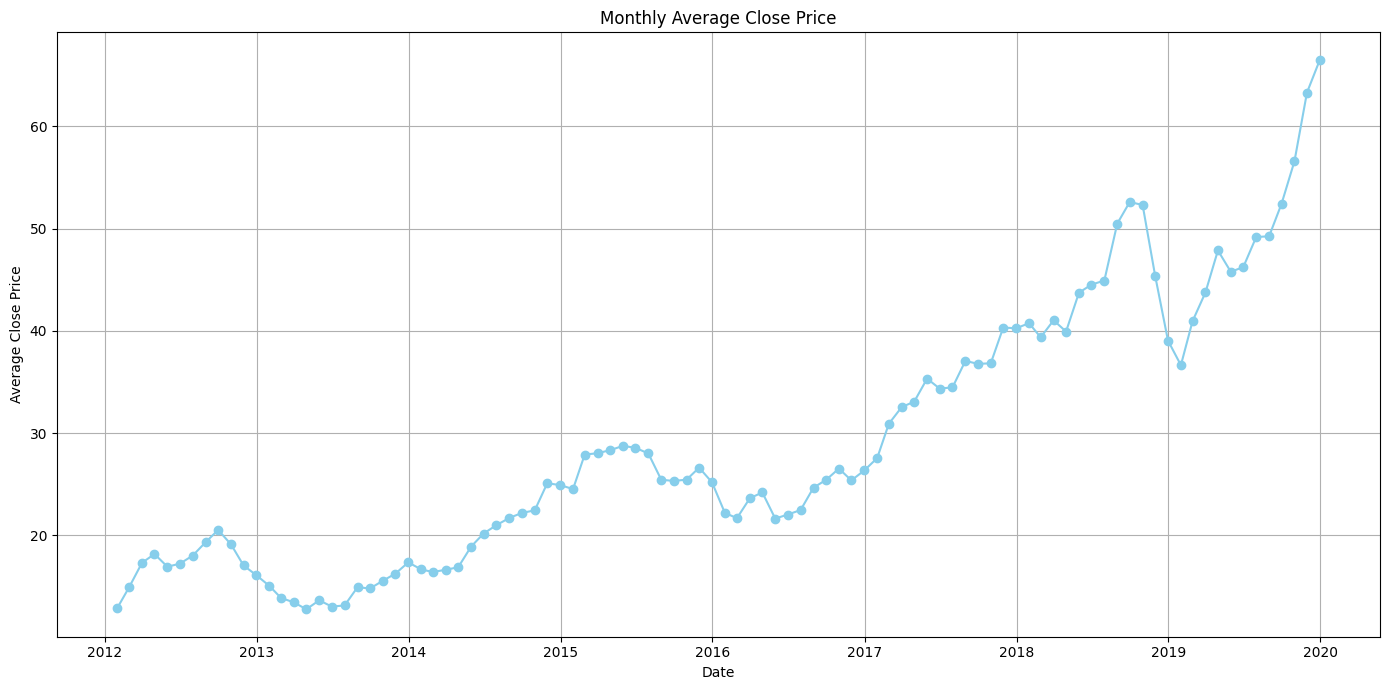

In [21]:
import matplotlib.pyplot as plt

# Resample to monthly average 'close' price
df_monthly = df.set_index('date')['close'].resample('M').mean()

plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

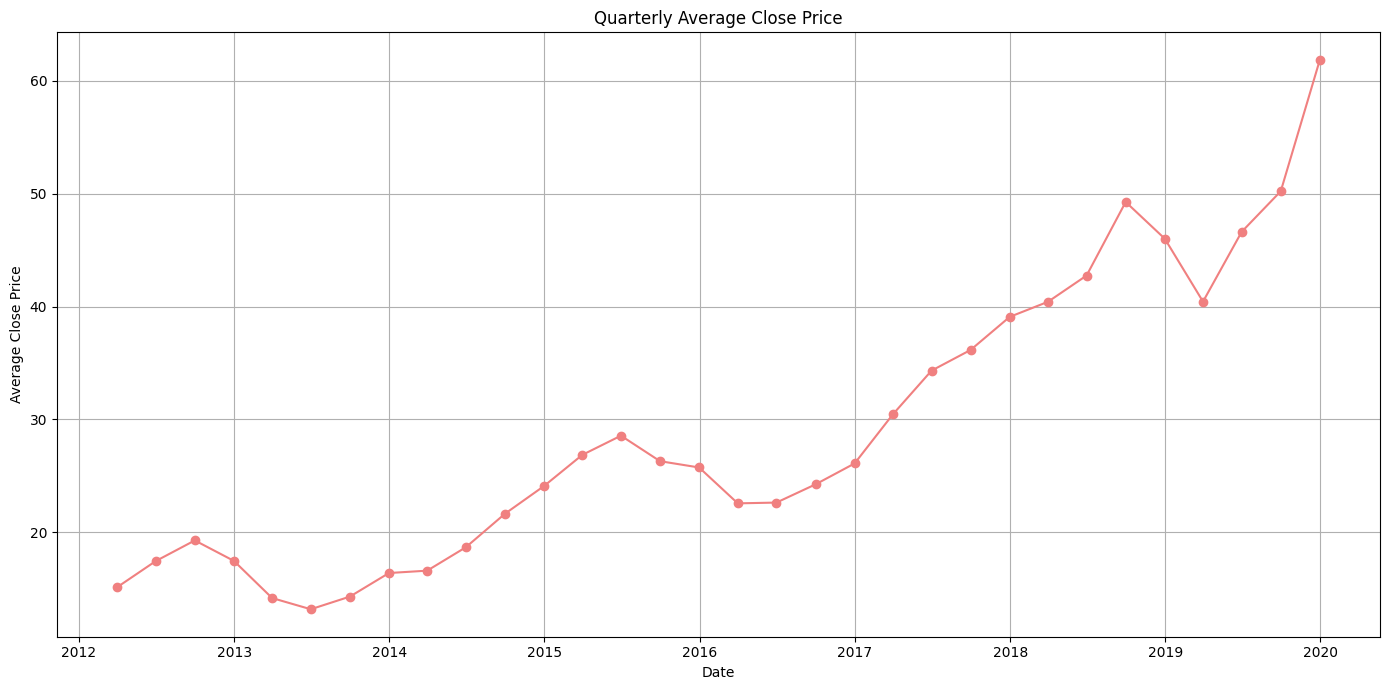

In [22]:
import matplotlib.pyplot as plt

# Resample to quarterly average 'close' price
df_quarterly = df.set_index('date')['close'].resample('Q').mean()

plt.figure(figsize=(14, 7))
plt.plot(df_quarterly.index, df_quarterly.values, marker='o', linestyle='-', color='lightcoral')
plt.title('Quarterly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering:

In [23]:
df['MA_7']  = df['close'].rolling(window=7).mean()
df['MA_14']=df['close'].rolling(window=14).mean()
df['MA_30']=df['close'].rolling(window=30).mean()

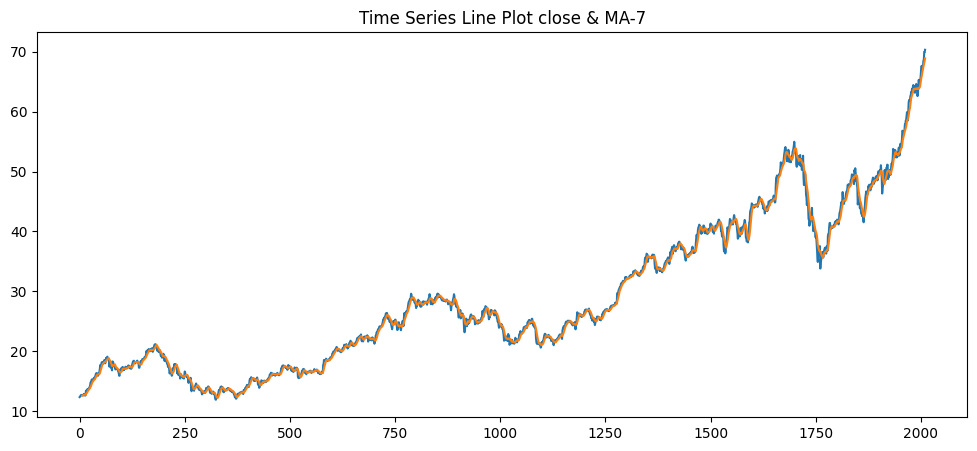

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['close'])
plt.plot(df['MA_7'])
plt.title("Time Series Line Plot close & MA-7")

plt.show()

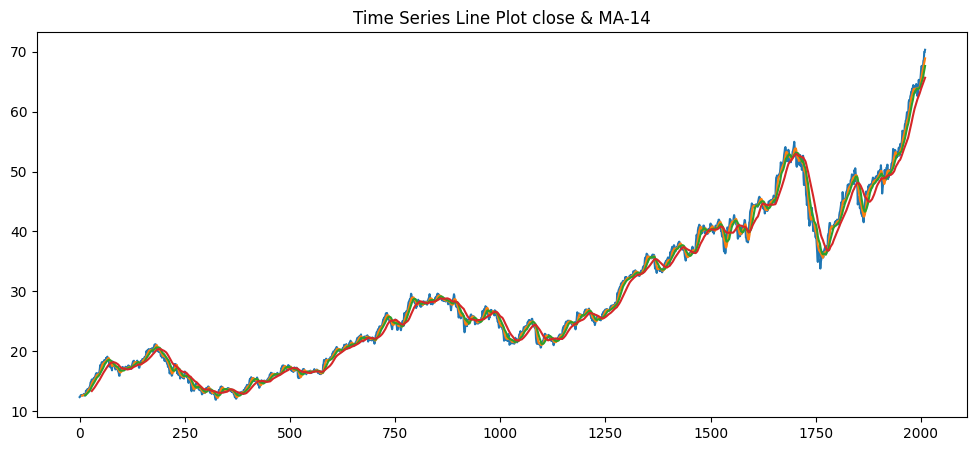

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['close'])
plt.plot(df['MA_7'])
plt.plot(df['MA_14'])
plt.plot(df['MA_30'])
plt.title("Time Series Line Plot close & MA-14")

plt.show()

In [26]:


# ===============================
# 1. Lag Features
# ===============================
lags = [1, 2, 3, 5, 7, 14, 21]

for lag in lags:
    df[f'lag_{lag}'] = df['close'].shift(lag)

# ===============================
# 2. Returns & Volatility
# ===============================
df['pct_change'] = df['close'].pct_change()
df['log_return'] = np.log(df['close'] / df['close'].shift(1))

df['volatility_7'] = df['log_return'].rolling(7).std()
df['volatility_14'] = df['log_return'].rolling(14).std()
df['volatility_30'] = df['log_return'].rolling(30).std()

# ===============================
# 3. Rolling Means (Trend)
# ===============================
rolling_windows = [5, 10, 20, 50]

for w in rolling_windows:
    df[f'rolling_mean_{w}'] = df['close'].rolling(w).mean()

# ===============================
# 4. Technical Indicators
# ===============================

# ---- RSI (14) ----
window_length = 14
delta = df['close'].diff()

gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window_length).mean()
avg_loss = pd.Series(loss).rolling(window_length).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))

# ---- MACD ----
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()

df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# ---- Bollinger Bands (20) ----
rolling_20 = df['close'].rolling(20)
df['BB_MID'] = rolling_20.mean()
df['BB_UPPER'] = df['BB_MID'] + 2 * rolling_20.std()
df['BB_LOWER'] = df['BB_MID'] - 2 * rolling_20.std()

# ---- EMA Indicators ----
df['EMA_9'] = df['close'].ewm(span=9, adjust=False).mean()
df['EMA_21'] = df['close'].ewm(span=21, adjust=False).mean()
df['EMA_50'] = df['close'].ewm(span=50, adjust=False).mean()

# ===============================
# 5. Date-Based Features
# ===============================
df_indexed = df.set_index('date')
df['day_of_week'] = df_indexed.index.dayofweek
df['is_month_end'] = df_indexed.index.is_month_end.astype(int)


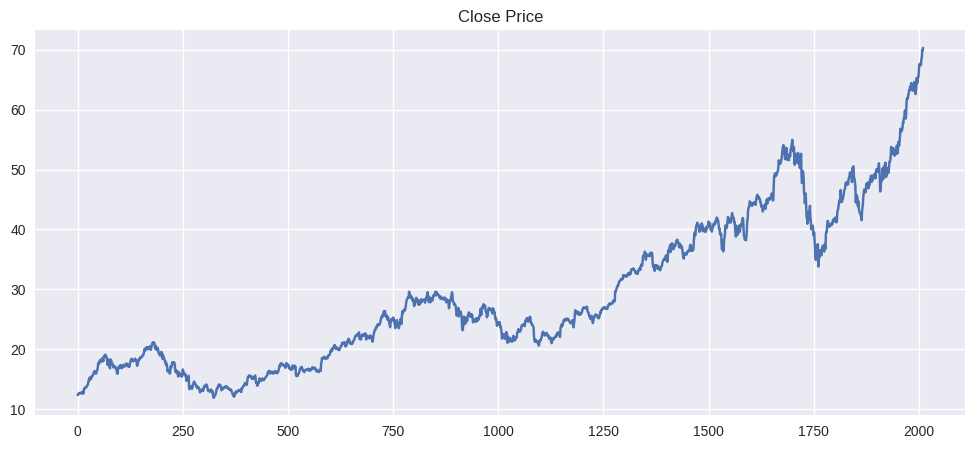

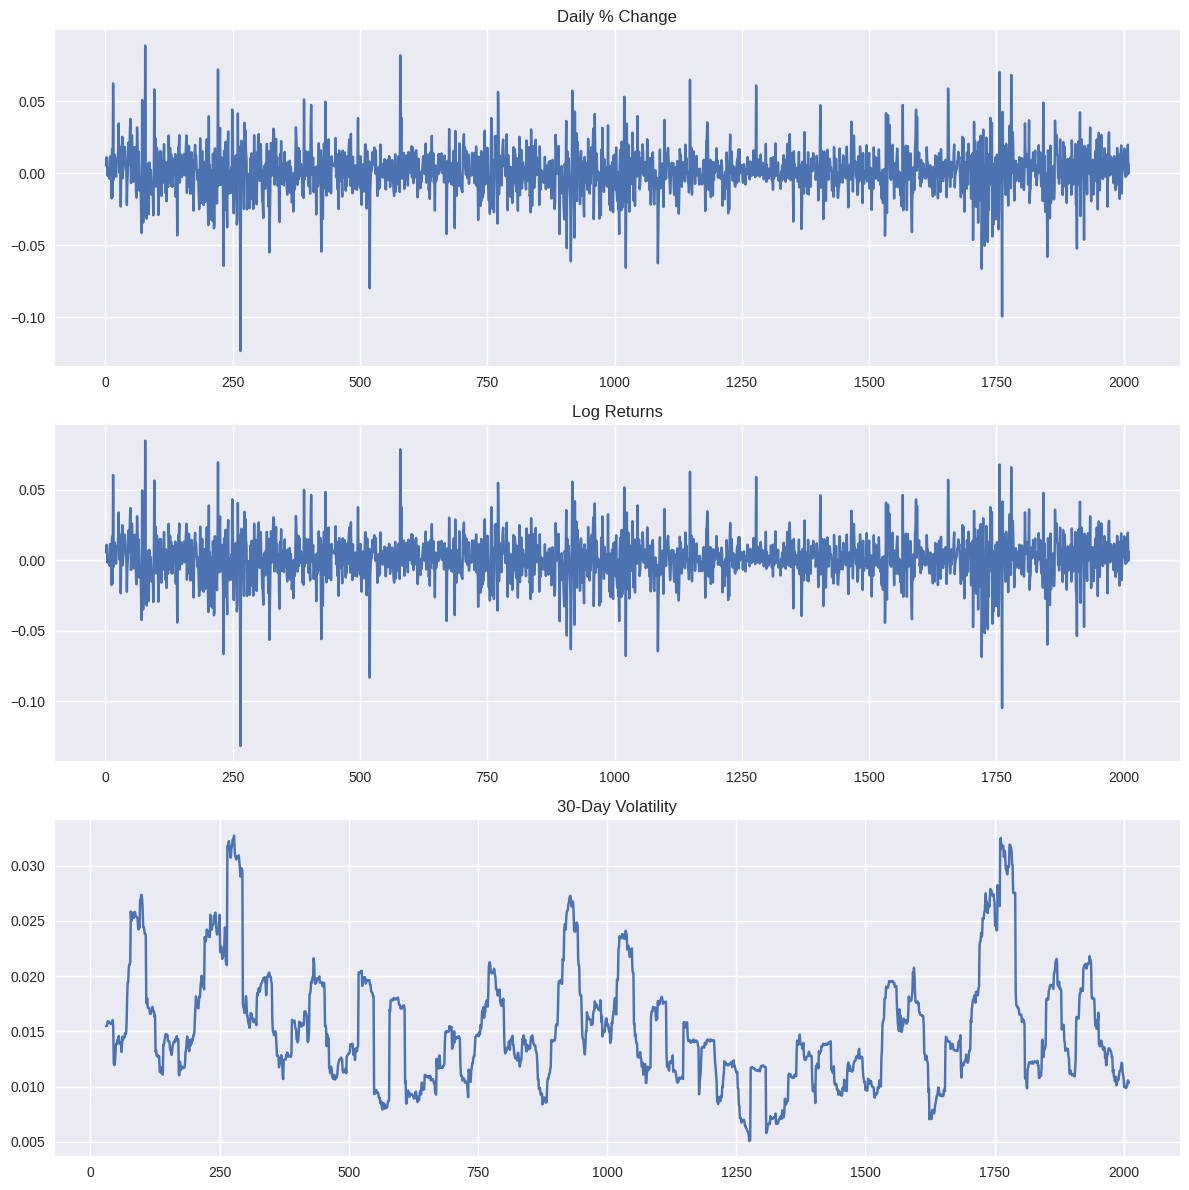

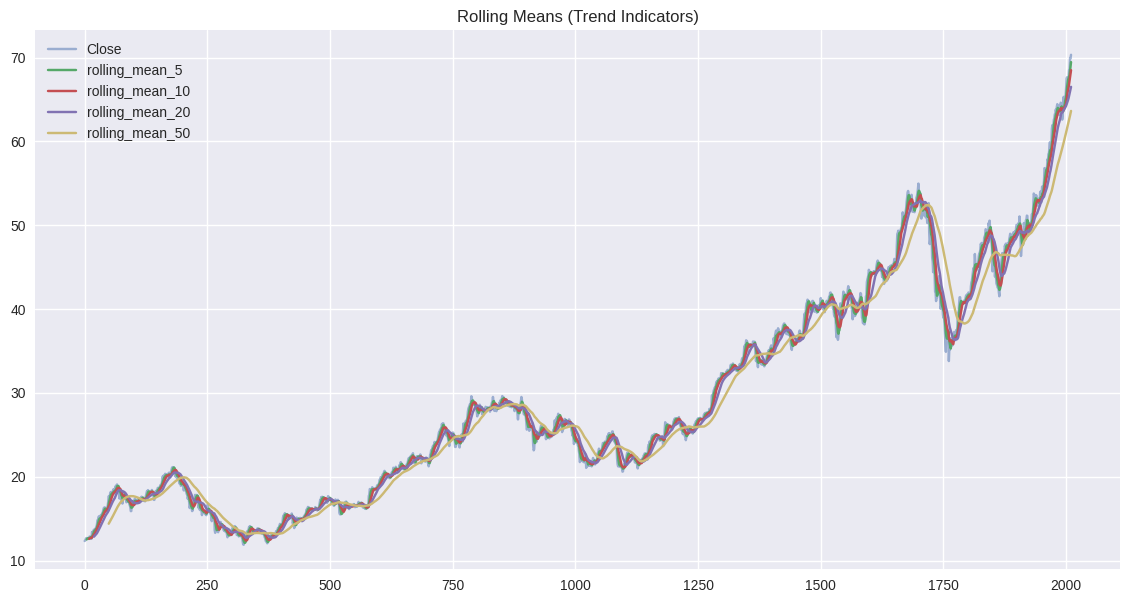

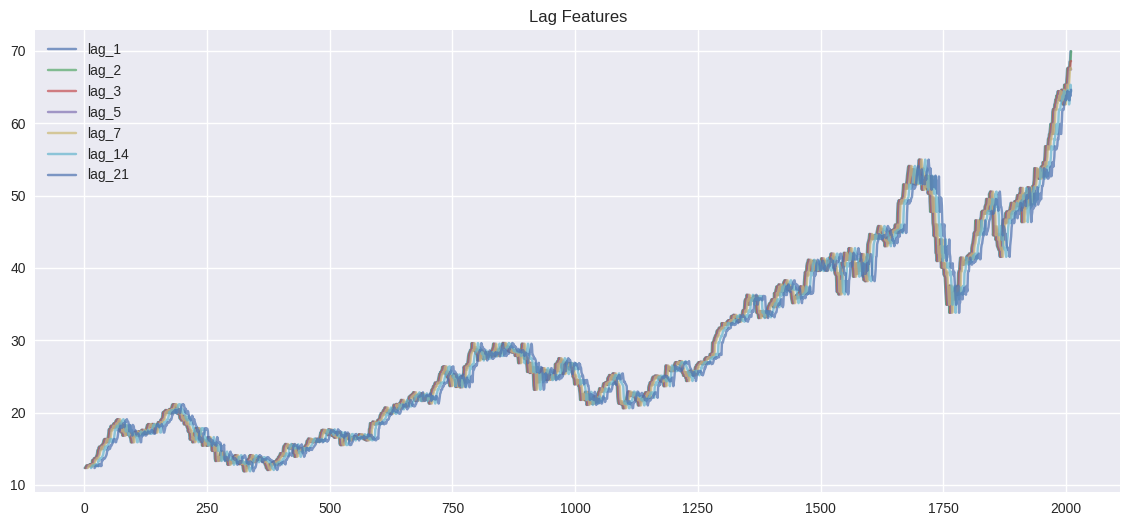

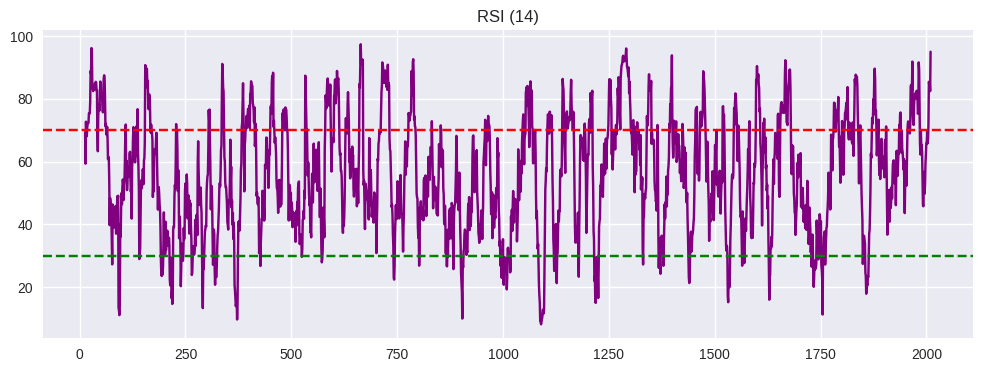

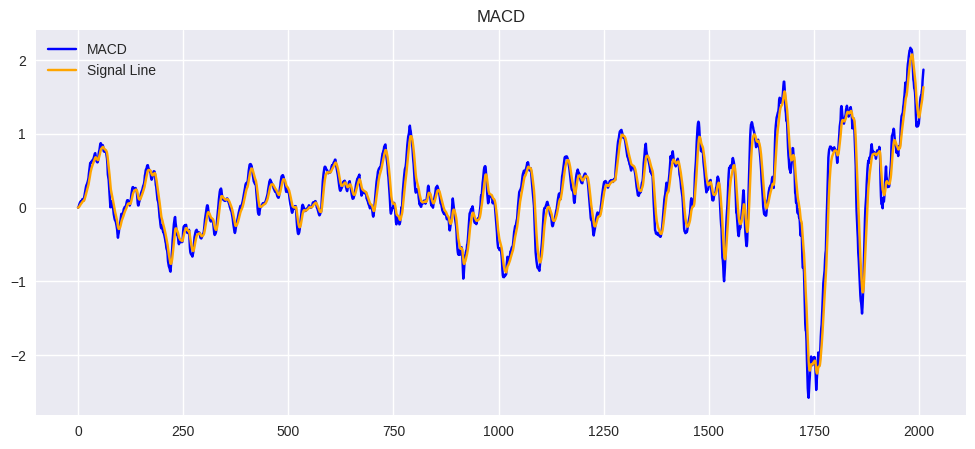

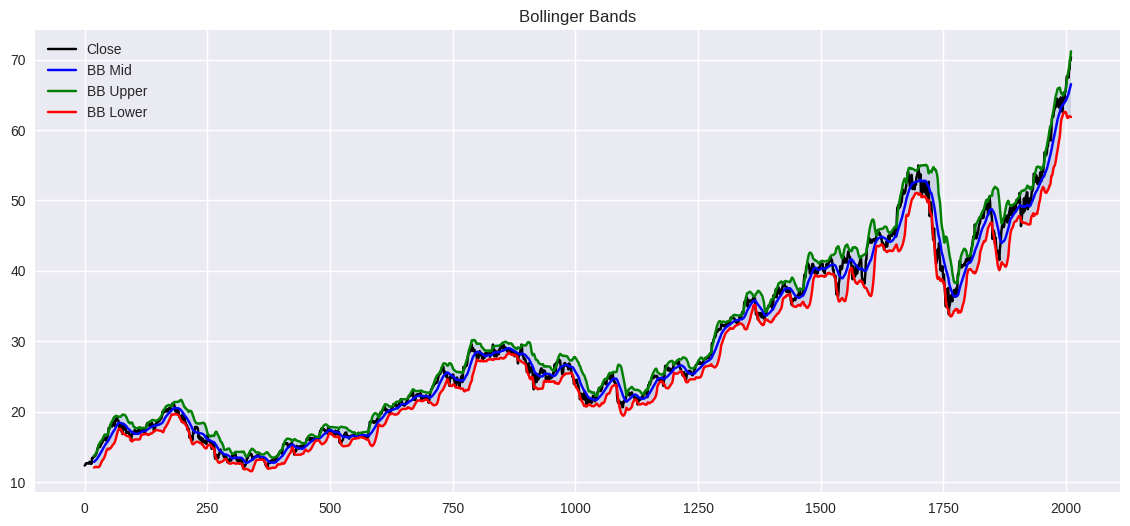

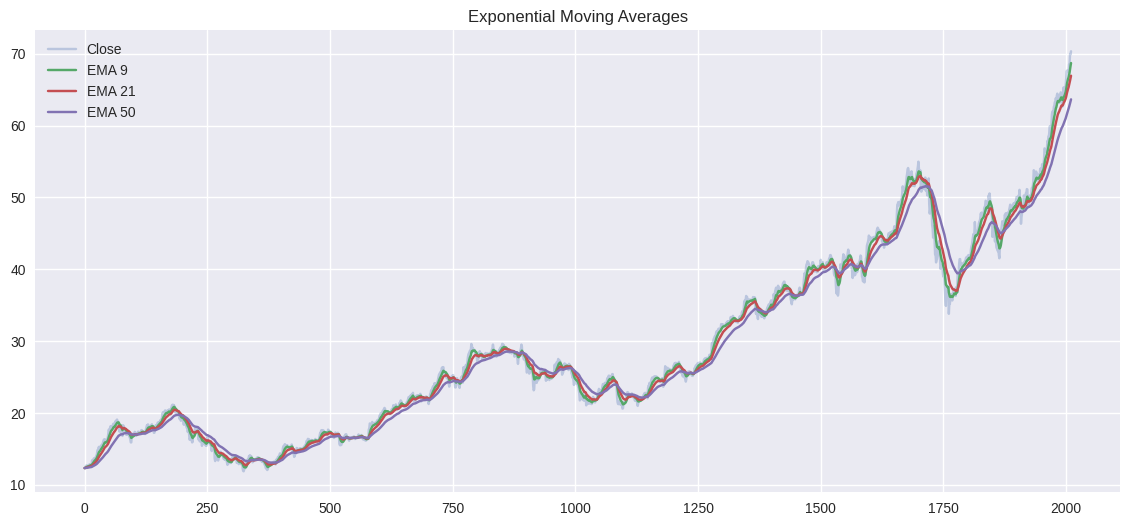

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

# =======================================================
# 1. Plot Close Price
# =======================================================
plt.figure(figsize=(12,5))
plt.plot(df['close'])
plt.title("Close Price")
plt.show()

# =======================================================
# 2. Plot Returns & Volatility
# =======================================================
fig, axs = plt.subplots(3, 1, figsize=(12,12))

axs[0].plot(df['pct_change'])
axs[0].set_title("Daily % Change")

axs[1].plot(df['log_return'])
axs[1].set_title("Log Returns")

axs[2].plot(df['volatility_30'])
axs[2].set_title("30-Day Volatility")

plt.tight_layout()
plt.show()

# =======================================================
# 3. Plot Rolling Means
# =======================================================
rolling_cols = ['rolling_mean_5', 'rolling_mean_10', 'rolling_mean_20', 'rolling_mean_50']

plt.figure(figsize=(14,7))
plt.plot(df['close'], label='Close', alpha=0.5)

for col in rolling_cols:
    plt.plot(df[col], label=col)

plt.title("Rolling Means (Trend Indicators)")
plt.legend()
plt.show()

# =======================================================
# 4. Plot Lag Features
# =======================================================
lag_cols = [col for col in df.columns if 'lag_' in col]

plt.figure(figsize=(14,6))
for col in lag_cols:
    plt.plot(df[col], alpha=0.7, label=col)

plt.title("Lag Features")
plt.legend()
plt.show()

# =======================================================
# 5. Plot RSI (14)
# =======================================================
plt.figure(figsize=(12,4))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(30, color='green', linestyle='--')
plt.axhline(70, color='red', linestyle='--')
plt.title("RSI (14)")
plt.show()

# =======================================================
# 6. Plot MACD
# =======================================================
plt.figure(figsize=(12,5))
plt.plot(df['MACD'], label="MACD", color="blue")
plt.plot(df['MACD_signal'], label="Signal Line", color="orange")
plt.title("MACD")
plt.legend()
plt.show()

# =======================================================
# 7. Plot Bollinger Bands
# =======================================================
plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close', color='black')
plt.plot(df['BB_MID'], label='BB Mid', color='blue')
plt.plot(df['BB_UPPER'], label='BB Upper', color='green')
plt.plot(df['BB_LOWER'], label='BB Lower', color='red')

plt.fill_between(df.index, df['BB_LOWER'], df['BB_UPPER'], alpha=0.2)
plt.title("Bollinger Bands")
plt.legend()
plt.show()

# =======================================================
# 8. Plot EMAs
# =======================================================
plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close', alpha=0.3)
plt.plot(df['EMA_9'], label='EMA 9')
plt.plot(df['EMA_21'], label='EMA 21')
plt.plot(df['EMA_50'], label='EMA 50')

plt.title("Exponential Moving Averages")
plt.legend()
plt.show()

In [28]:
df.columns

Index(['date', 'close', 'high', 'low', 'open', 'volume', 'close_diff', 'MA_7',
       'MA_14', 'MA_30', 'lag_1', 'lag_2', 'lag_3', 'lag_5', 'lag_7', 'lag_14',
       'lag_21', 'pct_change', 'log_return', 'volatility_7', 'volatility_14',
       'volatility_30', 'rolling_mean_5', 'rolling_mean_10', 'rolling_mean_20',
       'rolling_mean_50', 'RSI_14', 'EMA_12', 'EMA_26', 'MACD', 'MACD_signal',
       'BB_MID', 'BB_UPPER', 'BB_LOWER', 'EMA_9', 'EMA_21', 'EMA_50',
       'day_of_week', 'is_month_end'],
      dtype='object')

# Model Building and Model Evaluation

Train data length: 1608
Test data length: 403

Fitting ARIMA Model...
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1608
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -685.928
Date:                Tue, 23 Dec 2025   AIC                           1373.856
Time:                        04:32:47   BIC                           1379.238
Sample:                             0   HQIC                          1375.854
                               - 1608                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1375      0.003     48.872      0.000       0.132       0.143
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB)

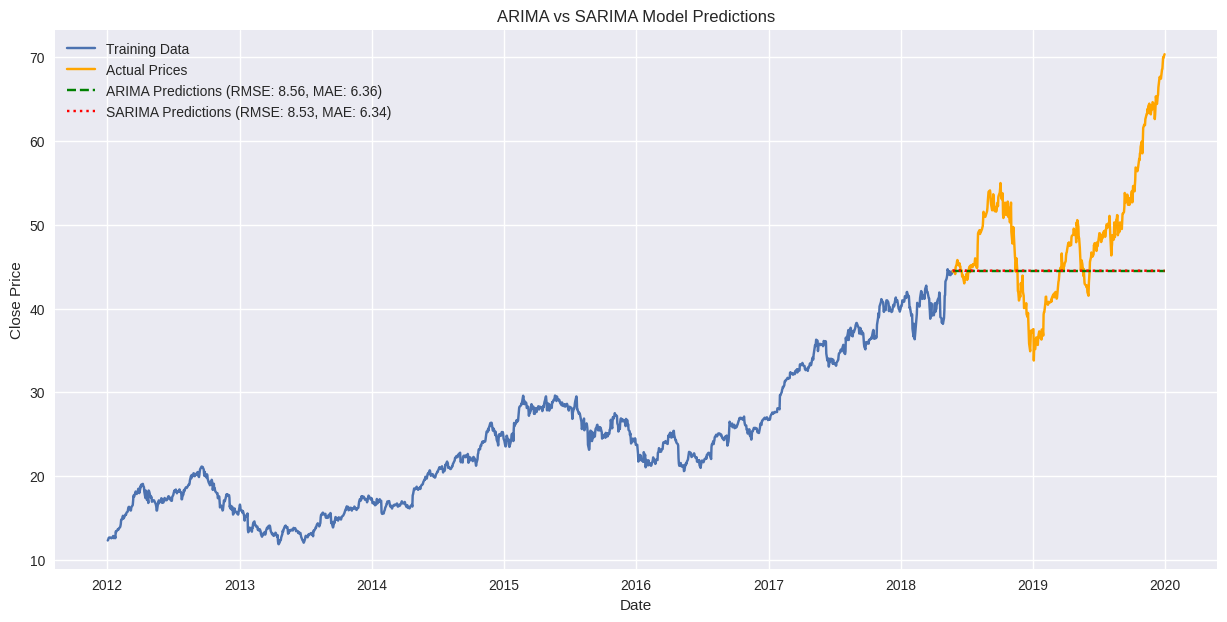


--- Model Performance Summary ---
ARIMA Model: RMSE = 8.56, MAE = 6.36
SARIMA Model: RMSE = 8.53, MAE = 6.34
SARIMA model performed better (lower RMSE).


In [29]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Prepare Data
# Ensure 'date' is a datetime object and set as index
df = df.reset_index() # Reset index to ensure 'date' is a column if it was already set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Select the target variable
data = df['close']

# Split data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data, test_data = data[0:train_size], data[train_size:]

print(f"Train data length: {len(train_data)}")
print(f"Test data length: {len(test_data)}")

# 2. Fit ARIMA Model
# Using ARIMA(5,1,0) as an example from typical practice, after initial differencing.
# 'd=1' is chosen because adfuller test on 'close_diff' showed stationarity.
print("\nFitting ARIMA Model...")
try:
    arima_model = ARIMA(train_data, order=(0, 1, 0))
    arima_model_fit = arima_model.fit()
    print(arima_model_fit.summary())

    # Make predictions
    arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(df)-1)

    # Evaluate ARIMA
    rmse_arima = np.sqrt(mean_squared_error(test_data, arima_predictions))
    mae_arima = mean_absolute_error(test_data, arima_predictions)
    print(f"\nARIMA RMSE: {rmse_arima}")
    print(f"ARIMA MAE: {mae_arima}")
except Exception as e:
    print(f"Error fitting ARIMA model: {e}")
    arima_predictions = pd.Series([np.nan]*len(test_data), index=test_data.index) # Fill with NaNs to avoid plot errors
    rmse_arima, mae_arima = np.nan, np.nan


# 3. Fit SARIMA Model
# Using SARIMA(1,1,0)(1,0,1,5) as an example.
# 'd=1' for non-seasonal differencing, 'D=0' for seasonal differencing, 'S=5' for weekly seasonality.
print("\nFitting SARIMA Model...")
try:
    sarima_model = SARIMAX(train_data, order=(1, 1, 0), seasonal_order=(1, 0, 1, 5))
    sarima_model_fit = sarima_model.fit(disp=False) # disp=False to suppress optimization output
    print(sarima_model_fit.summary())

    # Make predictions
    sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(df)-1)

    # Evaluate SARIMA
    rmse_sarima = np.sqrt(mean_squared_error(test_data, sarima_predictions))
    mae_sarima = mean_absolute_error(test_data, sarima_predictions)
    print(f"\nSARIMA RMSE: {rmse_sarima}")
    print(f"SARIMA MAE: {mae_sarima}")
except Exception as e:
    print(f"Error fitting SARIMA model: {e}")
    sarima_predictions = pd.Series([np.nan]*len(test_data), index=test_data.index) # Fill with NaNs to avoid plot errors
    rmse_sarima, mae_sarima = np.nan, np.nan

# 4. Visualize Predictions
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices', color='orange')
plt.plot(test_data.index, arima_predictions, label=f'ARIMA Predictions (RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f})', color='green', linestyle='--')
plt.plot(test_data.index, sarima_predictions, label=f'SARIMA Predictions (RMSE: {rmse_sarima:.2f}, MAE: {mae_sarima:.2f})', color='red', linestyle=':')

plt.title('ARIMA vs SARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Final Summary
print("\n--- Model Performance Summary ---")
print(f"ARIMA Model: RMSE = {rmse_arima:.2f}, MAE = {mae_arima:.2f}")
print(f"SARIMA Model: RMSE = {rmse_sarima:.2f}, MAE = {mae_sarima:.2f}")

if rmse_arima < rmse_sarima:
    print("ARIMA model performed better (lower RMSE).")
elif rmse_sarima < rmse_arima:
    print("SARIMA model performed better (lower RMSE).")
else:
    print("Both ARIMA and SARIMA models performed similarly (RMSE).")

XGBoost Train data length: 1559
XGBoost Test data length: 403

Fitting XGBoost Regressor Model...

XGBoost RMSE: 8.39
XGBoost MAE: 5.74


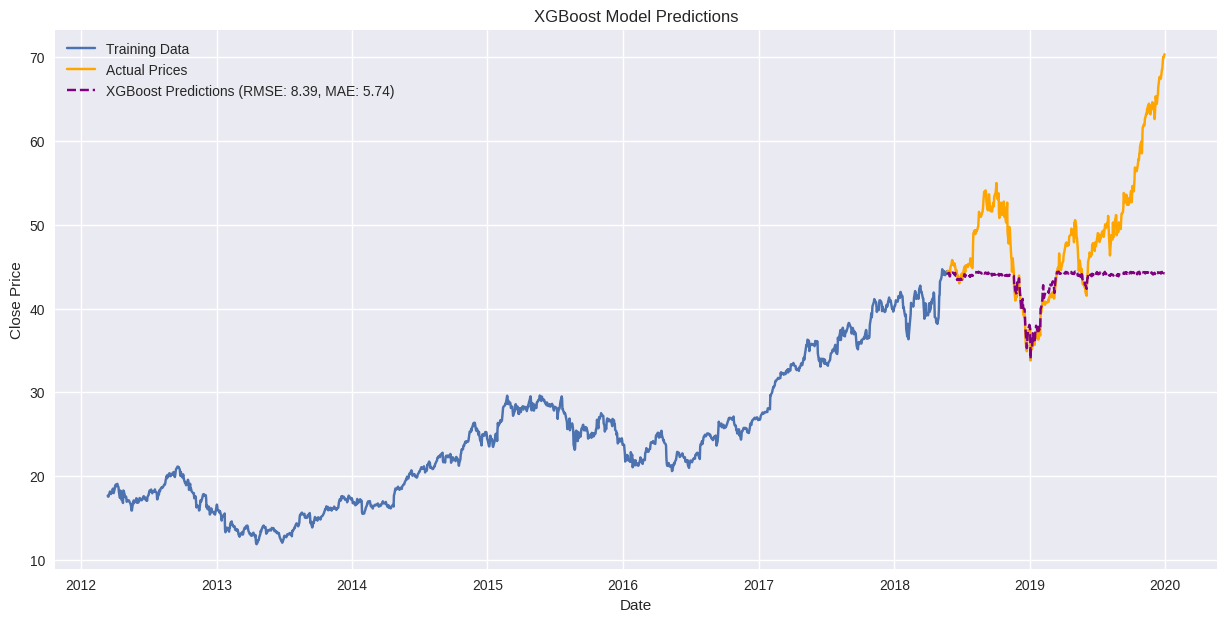


--- XGBoost Model Performance Summary ---
XGBoost Model: RMSE = 8.39, MAE = 5.74


In [30]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Handle any remaining NaN values
df_cleaned = df.copy().dropna()

# 2. Define feature matrix X and target variable y
# Exclude 'close' from features as it's the target.
# 'date' is expected to be the index of df_cleaned at this point.
features = [col for col in df_cleaned.columns if col not in ['date','close','close_diff']]
X = df_cleaned[features]
y = df_cleaned['close']

# Ensure all features are numeric. Handle potential non-numeric types.
for col in X.columns:
    if X[col].dtype == 'object': # Check for object type columns, could be mixed types or strings
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except:
            print(f"Warning: Column '{col}' could not be converted to numeric and will be dropped.")
            X = X.drop(columns=[col])
# Drop any columns that became entirely NaN after conversion if 'errors='coerce' was used
X = X.dropna(axis=1, how='all')
# Also drop any rows that might have introduced NaNs during numeric conversion
X = X.dropna()
y = y.loc[X.index] # Align y with cleaned X

# 3. Split the X and y data into training and testing sets using the same split date
# as established for ARIMA/SARIMA models.
# We need the last date of the ARIMA/SARIMA training set.
# This assumes `train_data` from cell uPpSwj817E7p is still available in the kernel.
if 'train_data' in globals():
    split_date = train_data.index[-1]
else:
    # Fallback if train_data is not available (e.g., if cell was run independently)
    # Recalculate based on df from feature engineering, then align with df_cleaned
    temp_df = df.reset_index()
    split_index = int(len(temp_df) * 0.8)
    split_date = temp_df['date'].iloc[split_index]


X_train = X[X.index <= split_date]
X_test = X[X.index > split_date]
y_train = y[y.index <= split_date]
y_test = y[y.index > split_date]

print(f"XGBoost Train data length: {len(X_train)}")
print(f"XGBoost Test data length: {len(X_test)}")

# 4. Initialize and Train XGBRegressor model
print("\nFitting XGBoost Regressor Model...")
# Start with default parameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Make predictions
xgb_predictions = xgb_model.predict(X_test)

# 6. Evaluate XGBoost model
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
print(f"\nXGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")

# 7. Visualize Predictions
plt.figure(figsize=(15, 7))
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Actual Prices', color='orange')
plt.plot(y_test.index, xgb_predictions, label=f'XGBoost Predictions (RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f})', color='purple', linestyle='--')

plt.title('XGBoost Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- XGBoost Model Performance Summary ---")
print(f"XGBoost Model: RMSE = {rmse_xgb:.2f}, MAE = {mae_xgb:.2f}")

LSTM Train data length: 1560
LSTM Test data length: 391

Defining and Training LSTM Model...
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

LSTM RMSE: 1.43
LSTM MAE: 1.15


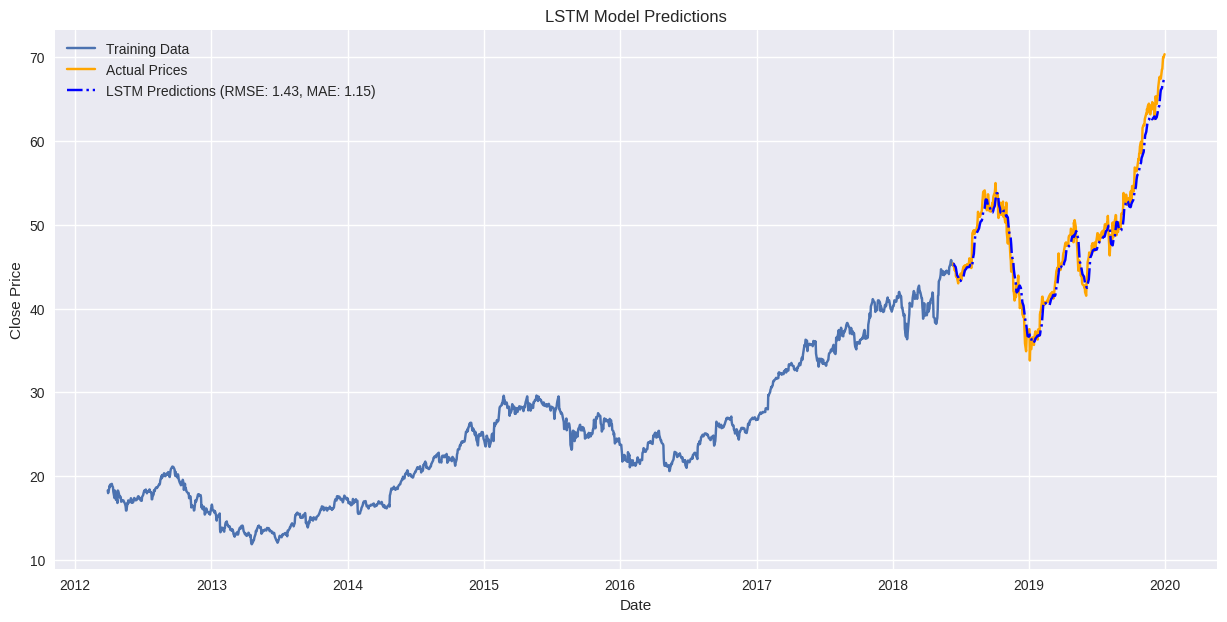


--- LSTM Model Performance Summary ---
LSTM Model: RMSE = 1.43, MAE = 1.15


In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# 1. Extract the 'close' price column and reshape for scaler
close_prices = df['close'].values.reshape(-1, 1)

# 2. Scale the 'close' price data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 3. Define a look_back window for creating input sequences
look_back = 60 # Using 60 time steps as an example

# Function to create dataset sequences
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create input sequences (X) and corresponding output values (y)
X_scaled, y_scaled = create_dataset(scaled_data, look_back)

# 4. Split the sequenced data into training and testing sets (80/20 split)
train_size_lstm = int(len(X_scaled) * 0.8)
X_train_lstm, X_test_lstm = X_scaled[0:train_size_lstm], X_scaled[train_size_lstm:]
y_train_lstm, y_test_lstm = y_scaled[0:train_size_lstm], y_scaled[train_size_lstm:]

print(f"LSTM Train data length: {len(X_train_lstm)}")
print(f"LSTM Test data length: {len(X_test_lstm)}")

# 5. Reshape input data to be 3-dimensional (samples, time steps, features)
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

# 6. Define a sequential LSTM model
print("\nDefining and Training LSTM Model...")
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# 7. Train the LSTM model
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=0)

# 8. Make predictions
lstm_predictions_scaled = lstm_model.predict(X_test_lstm)

# 9. Inverse transform predictions and actual values
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
y_test_actual = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# 10. Calculate RMSE and MAE for the LSTM model
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))
mae_lstm = mean_absolute_error(y_test_actual, lstm_predictions)
print(f"\nLSTM RMSE: {rmse_lstm:.2f}")
print(f"LSTM MAE: {mae_lstm:.2f}")

# 11. Visualize Predictions
plt.figure(figsize=(15, 7))

# Shift train predictions for plotting
train_plot_index = df.index[look_back:train_size_lstm + look_back]
plt.plot(train_plot_index, scaler.inverse_transform(y_train_lstm.reshape(-1, 1)), label='Training Data')

# Test data index
test_plot_index = df.index[train_size_lstm + look_back:train_size_lstm + look_back + len(y_test_actual)]

plt.plot(test_plot_index, y_test_actual, label='Actual Prices', color='orange')
plt.plot(test_plot_index, lstm_predictions, label=f'LSTM Predictions (RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f})', color='blue', linestyle='-.')

plt.title('LSTM Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- LSTM Model Performance Summary ---")
print(f"LSTM Model: RMSE = {rmse_lstm:.2f}, MAE = {mae_lstm:.2f}")

Prophet Train data length: 1609
Prophet Test data length: 402

Fitting Prophet Model...

Prophet RMSE: 6.34
Prophet MAE: 5.43


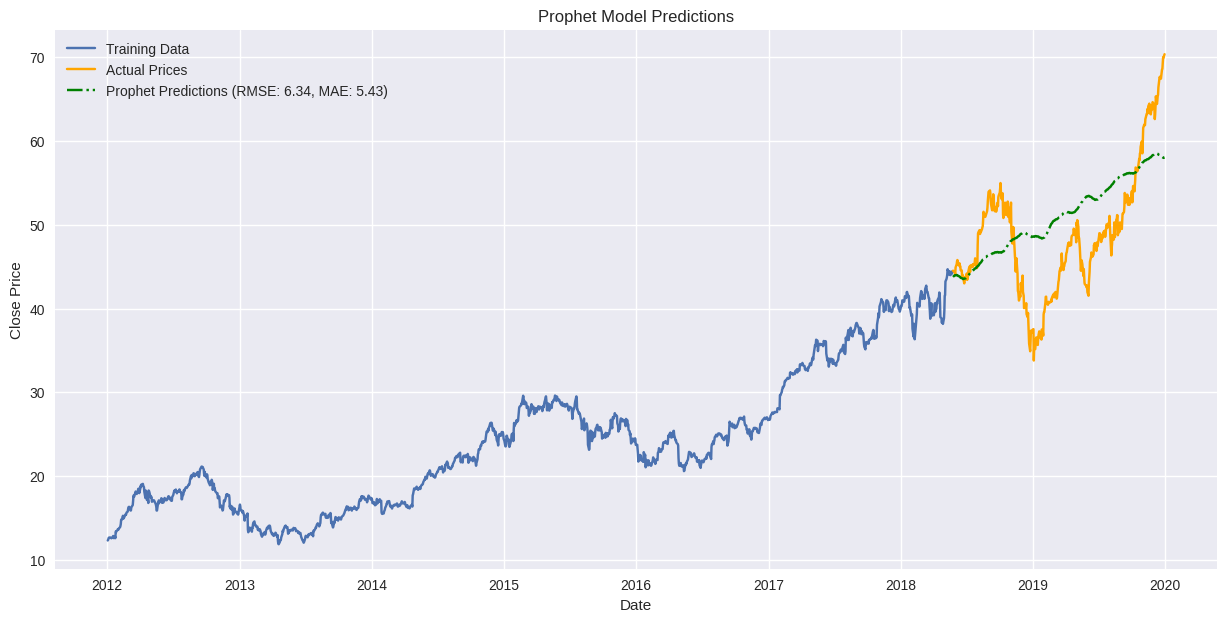


--- Prophet Model Performance Summary ---
Prophet Model: RMSE = 6.34, MAE = 5.43


In [32]:
from prophet import Prophet

# 1. Prepare data for Prophet: Prophet requires columns 'ds' (datestamp) and 'y' (target)
prophet_df = df.reset_index()[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

# 2. Split data into training and testing sets (using the same split point as previous models if possible)
# Prophet handles dates internally, so we use datetime for splitting

split_date = prophet_df['ds'].iloc[int(len(prophet_df) * 0.8)]

train_prophet = prophet_df[prophet_df['ds'] <= split_date]
test_prophet = prophet_df[prophet_df['ds'] > split_date]

print(f"Prophet Train data length: {len(train_prophet)}")
print(f"Prophet Test data length: {len(test_prophet)}")

# 3. Initialize and Train Prophet model
print("\nFitting Prophet Model...")
prophet_model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
prophet_model.fit(train_prophet)

# 4. Make predictions
# Create a future dataframe using the exact 'ds' values from the test set to ensure alignment
future = pd.DataFrame({'ds': test_prophet['ds']})
prophet_forecast = prophet_model.predict(future)

# Extract predictions, indexed by 'ds' for direct comparison
prophet_predictions = prophet_forecast.set_index('ds')['yhat']

# 5. Evaluate Prophet model
# Ensure the actual test data is also indexed by 'ds' for correct alignment
test_prophet_indexed = test_prophet.set_index('ds')

rmse_prophet = np.sqrt(mean_squared_error(test_prophet_indexed['y'], prophet_predictions))
mae_prophet = mean_absolute_error(test_prophet_indexed['y'], prophet_predictions)
print(f"\nProphet RMSE: {rmse_prophet:.2f}")
print(f"Prophet MAE: {mae_prophet:.2f}")

# 6. Visualize Predictions
plt.figure(figsize=(15, 7))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Training Data')
plt.plot(test_prophet_indexed.index, test_prophet_indexed['y'], label='Actual Prices', color='orange')
plt.plot(prophet_predictions.index, prophet_predictions, label=f'Prophet Predictions (RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f})', color='green', linestyle='-.')

plt.title('Prophet Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Prophet Model Performance Summary ---")
print(f"Prophet Model: RMSE = {rmse_prophet:.2f}, MAE = {mae_prophet:.2f}")


--- Overall Model Performance Comparison ---
ARIMA Model:   RMSE = 8.56, MAE = 6.36
SARIMA Model:  RMSE = 8.53, MAE = 6.34
XGBoost Model: RMSE = 8.39, MAE = 5.74
LSTM Model:    RMSE = 1.43, MAE = 1.15
Prophet Model: RMSE = 6.34, MAE = 5.43

Based on RMSE, the best performing model is: LSTM


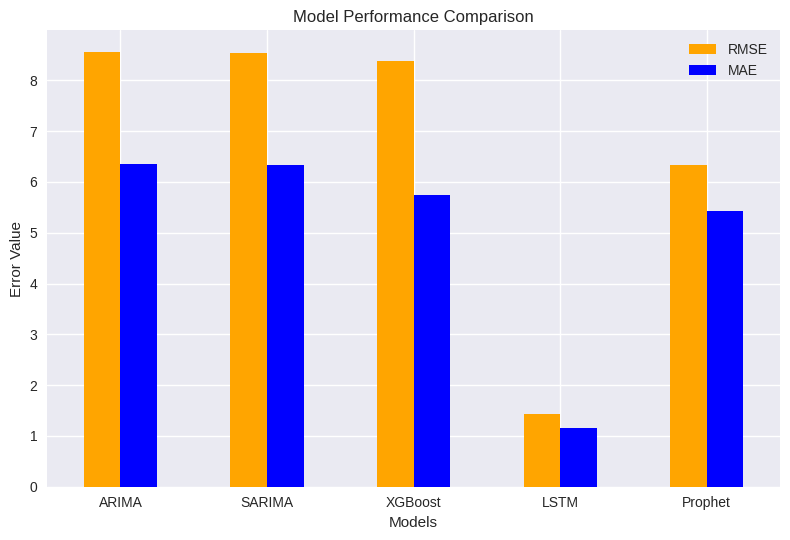

In [33]:
print("\n--- Overall Model Performance Comparison ---")
print(f"ARIMA Model:   RMSE = {rmse_arima:.2f}, MAE = {mae_arima:.2f}")
print(f"SARIMA Model:  RMSE = {rmse_sarima:.2f}, MAE = {mae_sarima:.2f}")
print(f"XGBoost Model: RMSE = {rmse_xgb:.2f}, MAE = {mae_xgb:.2f}")
print(f"LSTM Model:    RMSE = {rmse_lstm:.2f}, MAE = {mae_lstm:.2f}")
print(f"Prophet Model: RMSE = {rmse_prophet:.2f}, MAE = {mae_prophet:.2f}")

# Determine the best model based on RMSE
rmse_values = {
    'ARIMA': rmse_arima,
    'SARIMA': rmse_sarima,
    'XGBoost': rmse_xgb,
    'LSTM': rmse_lstm,
    'Prophet': rmse_prophet
}

best_model_rmse = min(rmse_values, key=rmse_values.get)
print(f"\nBased on RMSE, the best performing model is: {best_model_rmse}")


model_performance = {
    "ARIMA": {"RMSE": rmse_arima, "MAE": mae_arima},
    "SARIMA": {"RMSE": rmse_sarima, "MAE": mae_sarima},
    "XGBoost": {"RMSE": rmse_xgb, "MAE": mae_xgb},
    "LSTM": {"RMSE": rmse_lstm, "MAE": mae_lstm},
    "Prophet": {"RMSE": rmse_prophet, "MAE": mae_prophet}
}


df_performance = pd.DataFrame.from_dict(model_performance, orient='index')


import matplotlib.pyplot as plt

# Plot grouped bar chart
df_performance.plot(kind='bar',color=['orange','blue'])

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Error Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



### Predicting the Next 30 Days with LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

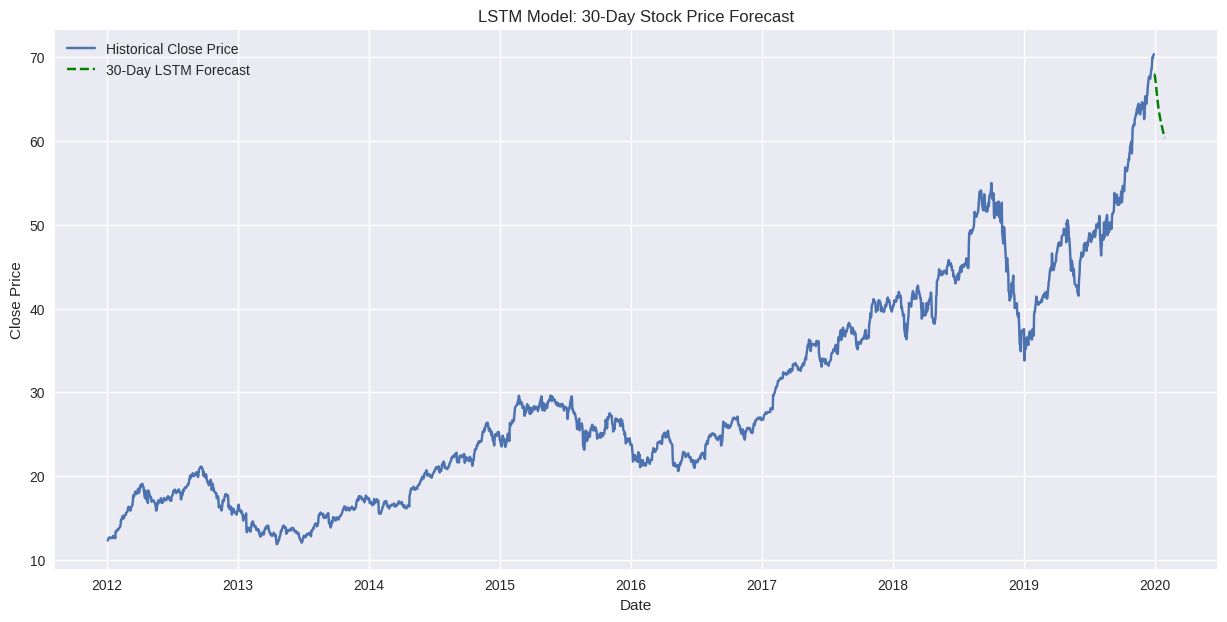

Predicted Close Prices for the next 30 days:
2019-12-31: 67.89
2020-01-01: 67.91
2020-01-02: 67.74
2020-01-03: 67.45
2020-01-04: 67.08
2020-01-05: 66.67
2020-01-06: 66.24
2020-01-07: 65.81
2020-01-08: 65.39
2020-01-09: 64.99
2020-01-10: 64.61
2020-01-11: 64.26
2020-01-12: 63.93
2020-01-13: 63.63
2020-01-14: 63.35
2020-01-15: 63.09
2020-01-16: 62.85
2020-01-17: 62.63
2020-01-18: 62.42
2020-01-19: 62.22
2020-01-20: 62.03
2020-01-21: 61.84
2020-01-22: 61.65
2020-01-23: 61.46
2020-01-24: 61.28
2020-01-25: 61.09
2020-01-26: 60.90
2020-01-27: 60.72
2020-01-28: 60.53
2020-01-29: 60.34


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df is indexed by date for easier date handling
if not isinstance(df.index, pd.DatetimeIndex):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# Assuming 'scaled_data' and 'scaler' from the previous LSTM cell are available
# Also assuming 'look_back' (60) and 'lstm_model' are available

# 1. Get the last 'look_back' days of data from the original scaled dataset
last_look_back_data = scaled_data[-look_back:]

# Reshape for LSTM input
current_batch = last_look_back_data.reshape(1, look_back, 1)

# 2. Predict the next 30 days
predicted_30_days_scaled = []
num_prediction_days = 30

for i in range(num_prediction_days):
    # Get the prediction for the next day
    next_day_prediction = lstm_model.predict(current_batch)[0]
    predicted_30_days_scaled.append(next_day_prediction)

    # Update the input batch to include the new prediction and remove the oldest value
    current_batch = np.append(current_batch[:, 1:, :], [[next_day_prediction]], axis=1)

# 3. Inverse transform the predictions to original scale
predicted_30_days = scaler.inverse_transform(predicted_30_days_scaled)

# 4. Create future dates for plotting
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_prediction_days, freq='D')

# 5. Visualize the predictions
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['close'], label='Historical Close Price')
plt.plot(future_dates, predicted_30_days, label='30-Day LSTM Forecast', color='green', linestyle='--')

plt.title('LSTM Model: 30-Day Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted Close Prices for the next 30 days:")
for date, price in zip(future_dates, predicted_30_days):
    print(f"{date.strftime('%Y-%m-%d')}: {price[0]:.2f}")

**Reasoning**:
To confirm that LSTM has the lowest RMSE and MAE, I will display the `df_performance` DataFrame which contains the performance metrics for all models.



## Hyperparameter Tuning with Long Short Term Memory(LSTM):

In [35]:
print(df_performance)

             RMSE       MAE
ARIMA    8.558238  6.361054
SARIMA   8.532474  6.338120
XGBoost  8.385879  5.736652
LSTM     1.430090  1.154173
Prophet  6.336870  5.425192


In [36]:
units_options = [50, 75, 100]
num_lstm_layers_options = [1, 2]
epochs_options = [20, 30]
batch_size_options = [32, 64]

print(f"LSTM Units Options: {units_options}")
print(f"Number of LSTM Layers Options: {num_lstm_layers_options}")
print(f"Epochs Options: {epochs_options}")
print(f"Batch Size Options: {batch_size_options}")

LSTM Units Options: [50, 75, 100]
Number of LSTM Layers Options: [1, 2]
Epochs Options: [20, 30]
Batch Size Options: [32, 64]


**Reasoning**:
Now that the hyperparameter search space is defined, I will iterate through all combinations of these hyperparameters to train and evaluate multiple LSTM models. This will allow for the identification of the optimal hyperparameter set based on performance metrics.




Training LSTM → Units=50, Layers=1, Epochs=20, Batch=32
RMSE: 1.2097, MAE: 0.9304

Training LSTM → Units=50, Layers=1, Epochs=20, Batch=64
RMSE: 1.5173, MAE: 1.1552

Training LSTM → Units=50, Layers=1, Epochs=30, Batch=32
RMSE: 1.2922, MAE: 0.9722

Training LSTM → Units=50, Layers=1, Epochs=30, Batch=64
RMSE: 1.4627, MAE: 1.1366

Training LSTM → Units=50, Layers=2, Epochs=20, Batch=32
RMSE: 1.4007, MAE: 1.0977

Training LSTM → Units=50, Layers=2, Epochs=20, Batch=64
RMSE: 1.7785, MAE: 1.4499

Training LSTM → Units=50, Layers=2, Epochs=30, Batch=32
RMSE: 1.1540, MAE: 0.8722

Training LSTM → Units=50, Layers=2, Epochs=30, Batch=64
RMSE: 1.4609, MAE: 1.1270

Training LSTM → Units=75, Layers=1, Epochs=20, Batch=32
RMSE: 1.1715, MAE: 0.9114

Training LSTM → Units=75, Layers=1, Epochs=20, Batch=64
RMSE: 2.0428, MAE: 1.7349

Training LSTM → Units=75, Layers=1, Epochs=30, Batch=32
RMSE: 1.1851, MAE: 0.9202

Training LSTM → Units=75, Layers=1, Epochs=30, Batch=64
RMSE: 1.3684, MAE: 1.0316

Tra

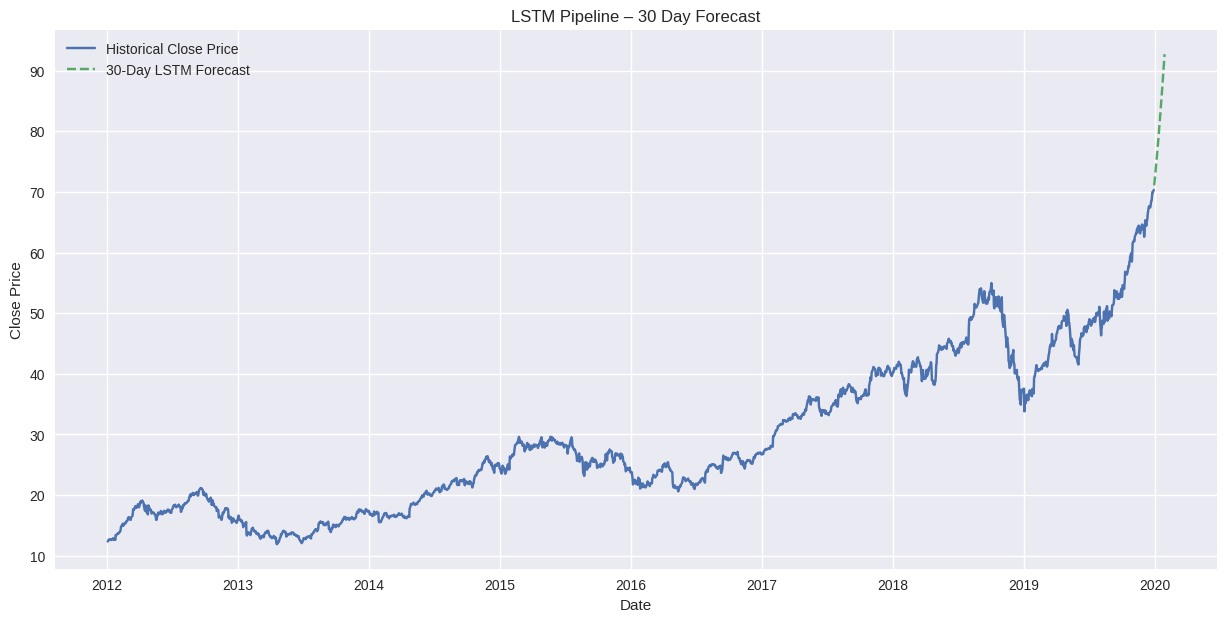


Predicted Close Prices for Next 30 Days:
2019-12-31 → 71.08
2020-01-01 → 71.66
2020-01-02 → 72.26
2020-01-03 → 72.87
2020-01-04 → 73.50
2020-01-05 → 74.15
2020-01-06 → 74.80
2020-01-07 → 75.47
2020-01-08 → 76.14
2020-01-09 → 76.83
2020-01-10 → 77.53
2020-01-11 → 78.24
2020-01-12 → 78.96
2020-01-13 → 79.69
2020-01-14 → 80.44
2020-01-15 → 81.19
2020-01-16 → 81.95
2020-01-17 → 82.73
2020-01-18 → 83.52
2020-01-19 → 84.31
2020-01-20 → 85.12
2020-01-21 → 85.93
2020-01-22 → 86.75
2020-01-23 → 87.59
2020-01-24 → 88.43
2020-01-25 → 89.27
2020-01-26 → 90.13
2020-01-27 → 90.98
2020-01-28 → 91.85
2020-01-29 → 92.72


In [37]:
# =====================================================
# 1. Imports
# =====================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# =====================================================
# 2. Ensure Date Index
# =====================================================
if not isinstance(df.index, pd.DatetimeIndex):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)


# =====================================================
# 3. LSTM PIPELINE CLASS
# =====================================================
class LSTMPipeline:
    def __init__(self, look_back=60):
        self.look_back = look_back
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        self.model = None

    # -----------------------------
    # Create sequences
    # -----------------------------
    def create_sequences(self, data):
        X, y = [], []
        for i in range(len(data) - self.look_back):
            X.append(data[i:i + self.look_back, 0])
            y.append(data[i + self.look_back, 0])
        return np.array(X), np.array(y)

    # -----------------------------
    # Build LSTM model
    # -----------------------------
    def build_model(self, units, num_layers):
        model = Sequential()

        if num_layers == 1:
            model.add(LSTM(units, input_shape=(self.look_back, 1)))
        else:
            model.add(LSTM(units, return_sequences=True,
                           input_shape=(self.look_back, 1)))
            model.add(LSTM(units))

        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    # -----------------------------
    # Fit and evaluate
    # -----------------------------
    def fit_evaluate(self, series, units, num_layers, epochs, batch_size):
        # Scale
        scaled_data = self.scaler.fit_transform(series.reshape(-1, 1))

        # Create sequences
        X, y = self.create_sequences(scaled_data)

        # Time-based split
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Reshape for LSTM
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

        # Train
        self.model = self.build_model(units, num_layers)
        self.model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )

        # Predict
        preds_scaled = self.model.predict(X_test, verbose=0)
        preds = self.scaler.inverse_transform(preds_scaled)
        actual = self.scaler.inverse_transform(y_test.reshape(-1, 1))

        # Metrics
        rmse = np.sqrt(mean_squared_error(actual, preds))
        mae = mean_absolute_error(actual, preds)

        return rmse, mae

    # -----------------------------
    # Retrain on full data
    # -----------------------------
    def retrain_full(self, series, units, num_layers, epochs, batch_size):
        scaled_data = self.scaler.fit_transform(series.reshape(-1, 1))
        X, y = self.create_sequences(scaled_data)

        X = X.reshape(X.shape[0], X.shape[1], 1)

        self.model = self.build_model(units, num_layers)
        self.model.fit(
            X, y,
            epochs=epochs,
            batch_size=batch_size,
            verbose=0
        )

    # -----------------------------
    # Predict future values
    # -----------------------------
    def predict_future(self, series, steps=30):
        scaled_data = self.scaler.transform(series.reshape(-1, 1))
        last_seq = scaled_data[-self.look_back:].reshape(1, self.look_back, 1)

        future_preds = []

        for _ in range(steps):
            next_pred = self.model.predict(last_seq, verbose=0)[0]
            future_preds.append(next_pred)
            last_seq = np.append(last_seq[:, 1:, :], [[next_pred]], axis=1)

        return self.scaler.inverse_transform(future_preds)


# =====================================================
# 4. Hyperparameter Search Space
# =====================================================
units_options = [50, 75, 100]
num_layers_options = [1, 2]
epochs_options = [20, 30]
batch_size_options = [32, 64]


# =====================================================
# 5. Hyperparameter Tuning
# =====================================================
close_series = df['close'].values
pipeline = LSTMPipeline(look_back=60)

best_rmse = float('inf')
best_mae = float('inf')
best_hyperparams = {}
results = []

for units in units_options:
    for num_layers in num_layers_options:
        for epochs in epochs_options:
            for batch_size in batch_size_options:

                print(
                    f"\nTraining LSTM → Units={units}, Layers={num_layers}, "
                    f"Epochs={epochs}, Batch={batch_size}"
                )

                rmse, mae = pipeline.fit_evaluate(
                    series=close_series,
                    units=units,
                    num_layers=num_layers,
                    epochs=epochs,
                    batch_size=batch_size
                )

                print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

                results.append({
                    "units": units,
                    "layers": num_layers,
                    "epochs": epochs,
                    "batch_size": batch_size,
                    "rmse": rmse,
                    "mae": mae
                })

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_mae = mae
                    best_hyperparams = {
                        "units": units,
                        "layers": num_layers,
                        "epochs": epochs,
                        "batch_size": batch_size
                    }


# =====================================================
# 6. Best Hyperparameters
# =====================================================
print("\n--- Hyperparameter Tuning Complete ---")
print(f"Best RMSE: {best_rmse:.4f}")
print(f"Best MAE : {best_mae:.4f}")
print(f"Optimal Hyperparameters: {best_hyperparams}")


# =====================================================
# 7. Retrain Best Model on Full Dataset
# =====================================================
pipeline.retrain_full(
    series=close_series,
    units=best_hyperparams['units'],
    num_layers=best_hyperparams['layers'],
    epochs=best_hyperparams['epochs'],
    batch_size=best_hyperparams['batch_size']
)


# =====================================================
# 8. Predict Next 30 Days
# =====================================================
future_prices = pipeline.predict_future(close_series, steps=30)

future_dates = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1),
    periods=30,
    freq='D'
)


# =====================================================
# 9. Plot Forecast
# =====================================================
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['close'], label='Historical Close Price')
plt.plot(future_dates, future_prices,
         label='30-Day LSTM Forecast', linestyle='--')
plt.title('LSTM Pipeline – 30 Day Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


# =====================================================
# 10. Print Future Prices
# =====================================================
print("\nPredicted Close Prices for Next 30 Days:")
for date, price in zip(future_dates, future_prices):
    print(f"{date.date()} → {price[0]:.2f}")


# Model Deployment

In [38]:
pipeline.model.save('optimal_lstm_model.h5')
print("Optimal LSTM model saved as optimal_lstm_model.h5")

Optimal LSTM model saved as optimal_lstm_model.h5


In [39]:
import joblib

# Save the scaler object from the pipeline
joblib.dump(pipeline.scaler, 'scaler.pkl')
print("MinMaxScaler saved as scaler.pkl")

MinMaxScaler saved as scaler.pkl


In [40]:
!ls

optimal_lstm_model.h5  sample_data  scaler.pkl


In [41]:
!pip install streamlit yfinance pandas numpy tensorflow joblib pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.9 MB/s eta 0:00:00


In [42]:
%%writefile app.py
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
import joblib
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

# =====================================================
# Configuration
# =====================================================
MODEL_PATH = "optimal_lstm_model.h5"
SCALER_PATH = "scaler.pkl"
LOOK_BACK = 60              # MUST match training

# =====================================================
# Load Model & Scaler
# =====================================================
@st.cache_resource
def load_artifacts():
    model = load_model(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    return model, scaler

model, scaler = load_artifacts()

# =====================================================
# Fetch Historical Data
# =====================================================
@st.cache_data(ttl=3600)
def fetch_historical_data(ticker, start_date, end_date):

    df = yf.download(ticker, start=start_date, end=end_date)

    if df.empty:
        return None

    df = df.reset_index()
    df.columns = df.columns.map(lambda x: x[0] if isinstance(x, tuple) else x)
    df.columns = df.columns.str.lower()

    if "close" not in df.columns:
        return None

    df.set_index("date", inplace=True)
    df = df.sort_index()

    df.rename(columns={"close": "Close"}, inplace=True)

    # Moving Averages (for visualization only)
    df["MA_7"] = df["Close"].rolling(7).mean()
    df["MA_14"] = df["Close"].rolling(14).mean()
    df["MA_30"] = df["Close"].rolling(30).mean()

    return df

# =====================================================
# Forecast Logic (FIXED)
# =====================================================
def generate_forecast(historical_df, model, scaler, look_back, steps):

    if len(historical_df) < look_back:
        raise ValueError(f"Need at least {look_back} data points")

    # ---- CRITICAL FIX ----
    # Scale using FULL close series (same behavior as training)
    close_values = historical_df["Close"].values.reshape(-1, 1)
    scaled_close = scaler.transform(close_values)

    # Last look_back window
    current_batch = scaled_close[-look_back:].reshape(1, look_back, 1)

    future_scaled_preds = []

    for _ in range(steps):
        next_scaled = model.predict(current_batch, verbose=0)[0]
        future_scaled_preds.append(next_scaled)

        current_batch = np.append(
            current_batch[:, 1:, :],
            [[next_scaled]],
            axis=1
        )

    future_prices = scaler.inverse_transform(future_scaled_preds)

    future_dates = pd.date_range(
        start=historical_df.index[-1] + timedelta(days=1),
        periods=steps
    )

    forecast_df = pd.DataFrame(
        {"Forecasted Close": future_prices.flatten()},
        index=future_dates
    )

    return forecast_df

# =====================================================
# Streamlit UI
# =====================================================
st.set_page_config(layout="wide")
st.title("📈 LSTM Stock Price Forecast")
st.write("LSTM-based 30-day stock price prediction")

ticker = st.text_input("Stock Ticker", "AAPL").upper()

today = date.today()
start_date = st.date_input("Start Date", today - timedelta(days=5 * 365))
end_date = st.date_input("End Date", today)

num_prediction_days = st.number_input(
    "Number of days to forecast",
    min_value=1,
    max_value=365,
    value=30,
    step=1
)

historical_df = fetch_historical_data(ticker, start_date, end_date)

if historical_df is None:
    st.error("No data found. Please try another ticker or date range.")
    st.stop()

if len(historical_df) < LOOK_BACK:
    st.error(f"Not enough data. Need at least {LOOK_BACK} days.")
    st.stop()

forecast_df = generate_forecast(
    historical_df,
    model,
    scaler,
    LOOK_BACK,
    num_prediction_days # Use the dynamic value here
)

plot_df = pd.concat([historical_df, forecast_df])

# =====================================================
# Visualizations
# =====================================================
st.subheader("Historical Close Price")
st.line_chart(plot_df[["Close"]])

st.subheader("Close Price vs Moving Averages")
st.line_chart(plot_df[["Close", "MA_7", "MA_14", "MA_30"]])

st.subheader("Forecasted Prices") # Changed title for general use
st.line_chart(plot_df[["Close", "Forecasted Close"]])

st.subheader(f"Predicted Prices (Next {num_prediction_days} Days)")
st.dataframe(forecast_df)

st.subheader("Historical Data")
st.dataframe(historical_df)


Writing app.py


In [43]:
!ngrok authtoken "345l7kKMQnjJuqOYVU2XEZWbdE0_x2qdFethjWzpkXPG3PWj"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [44]:
from pyngrok import ngrok

# Disconnect all existing tunnels
ngrok.kill()
print("✅ All existing ngrok tunnels have been closed.")

✅ All existing ngrok tunnels have been closed.


In [45]:
import threading
import subprocess
from pyngrok import ngrok

def run_app():
    subprocess.run(["streamlit", "run", "/content/app.py", "--server.port", "8501"])

thread = threading.Thread(target=run_app)
thread.start()

public_url = ngrok.connect(addr=8501)
print("🎉 Your Streamlit app is live at:", public_url)


🎉 Your Streamlit app is live at: NgrokTunnel: "https://annalistically-unbeseeming-jazmine.ngrok-free.dev" -> "http://localhost:8501"
